We have two different datasets relatd to the OTT market in US. "OTT_Viewer_Data.xlsx" is more grannular (having demagraphics information - age, occupation and gender of viewer) while "OTT_Market_Data.xlsx" is more suitable for clustering having continuous dimensions such as population, OTT viewers, Number of markets, etc. 

+ So we first used "OTT_Market_Data.xlsx" for clustering to make clusters and then assigned those cluster labels to "OTT_Viewer_Data.xlsx" to extract information related to demographics
+ We applied three different types of clustering - Analysis 1, 2, 3 on the "OTT_Market_Data.xlsx" by chosing different combination of continuous dimensions.
+ We picked the best Analysis out of the three Analyses and then applied different clustering algorithms on that particular combination of dimension and applied an aggregation method to determine the final clusters.
+ Then we did investigation related to each of the finalized clusters

In [ ]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_rows', 220)

In [ ]:
#reading the excel into dataframe
df = pd.read_excel("OTT_Viewer_Data.xlsx")

In [ ]:
# check data
df.head()

,state,gender,age_group,status,viewers,population,potential_viewers
0,Alabama,male,13-19,employed,142950,346675,45744
1,Alabama,male,13-19,unemployed,116018,281360,74252
2,Alabama,female,13-19,employed,129484,296432,18128
3,Alabama,female,13-19,unemployed,129484,331602,98408
4,Alabama,male,20-29,employed,109388,265282,71102


In [ ]:
#checking the null values
df.isnull().sum()

state                0
gender               0
age_group            0
status               0
viewers              0
population           0
potential_viewers    0
dtype: int64

# Reading a seperate df with viewers and market data for each state

In [ ]:
#reading second file into the dataframe
df2 = pd.read_excel("OTT_Market_Data.xlsx")

In [ ]:
#checking the dataframe
df2.head()

,state,market,viewers,tv stations,media channels
0,Alabama,5,2071746,10,6
1,Alaska,3,223495,31,21
2,Arizona,3,2778702,19,19
3,Arkansas,3,983034,22,12
4,California,11,12826984,24,20


In [ ]:
#checking the null values
df2.isnull().sum()

state             0
market            0
viewers           0
tv stations       0
media channels    0
dtype: int64

# Clustering

In [ ]:
#importing important libraries for clustering
from sklearn.cluster import KMeans

There are multiple continuous dimensions that can be used for clustering. We will try out different (2D) clusters to check the optimal combination.

### Analysis 1
#### Market and viewers

In [ ]:
#creating a test 2D Dataframe for cluster Analysis
df3 = df2[['market','viewers']]

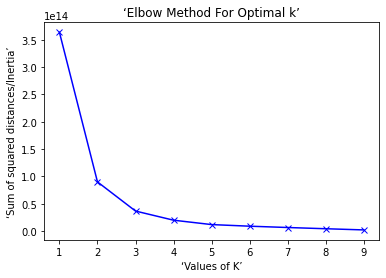

In [ ]:
# ELBOW Method to find no of clusters

Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df3)
 Sum_of_squared_distances.append(kmeans.inertia_)
#plotting the graph
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('‘Values of K’') 
plt.ylabel('‘Sum of squared distances/Inertia’') 
plt.title('‘Elbow Method For Optimal k’')
plt.show()

As observed from the ELbow method above, the optimum number of clusters should be "3"

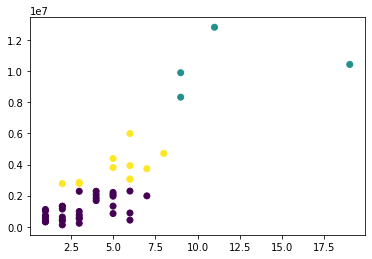

In [ ]:
# using Kmeans Clustering Algorithm 
k1 = KMeans(n_clusters=3)
k1.fit(df3)

# plotting the clusters 
plt.scatter(df3.iloc[:,0], df3.iloc[:,1], c=k1.labels_)
plt.show()

### Analysis 2
#### Viewers and TV Stations

In [ ]:
#creating a test 2D Dataframe for cluster Analysis
df3 = df2[['tv stations','viewers']]

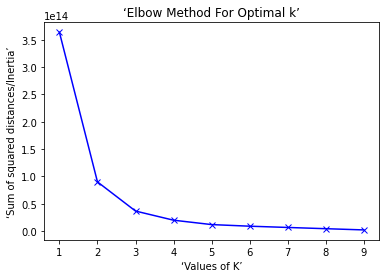

In [ ]:
# ELBOW Method to find no of clusters
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters) 
 kmeans.fit(df3)
 Sum_of_squared_distances.append(kmeans.inertia_)

 #plotting the graph
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('‘Values of K’') 
plt.ylabel('‘Sum of squared distances/Inertia’') 
plt.title('‘Elbow Method For Optimal k’')
plt.show()

As observed from the ELbow method above, the optimum number of clusters should be "3"

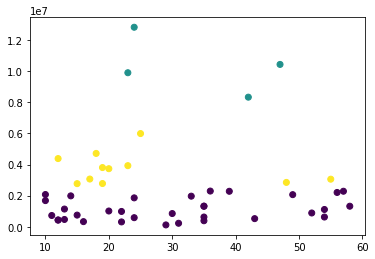

In [ ]:
# using Kmeans Clustering Algorithm 
k2 = KMeans(n_clusters=3)
k2.fit(df3)

# plotting the clusters 
plt.scatter(df3.iloc[:,0], df3.iloc[:,1], c=k2.labels_)
plt.show()

## Analysis 3 
### Viewers and Media Channels

In [ ]:
#creating a test 2D Dataframe for cluster Analysis
df3 = df2[['viewers','media channels']]

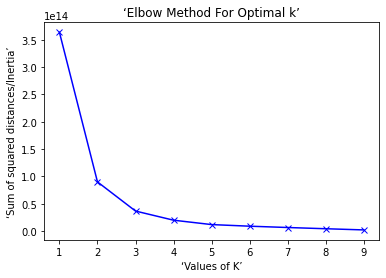

In [ ]:
# ELBOW Method to find no of clusters
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 k3 = KMeans(n_clusters=num_clusters)
 k3.fit(df3)
 Sum_of_squared_distances.append(k3.inertia_)

 #plotting the graph
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('‘Values of K’') 
plt.ylabel('‘Sum of squared distances/Inertia’') 
plt.title('‘Elbow Method For Optimal k’')
plt.show()

As observed from the ELbow method above, the optimum number of clusters should be "3"

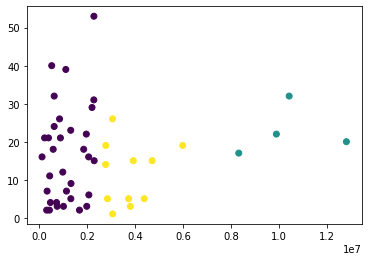

In [ ]:
# using Kmeans Clustering Algorithm 
k3 = KMeans(n_clusters=3)
k3.fit(df3)

# plotting the clusters 
plt.scatter(df3.iloc[:,0], df3.iloc[:,1], c=k3.labels_)
plt.show()

As the clusters appeared in Analysis 3 shows the best result


In [ ]:
#saving the labels from Analysis 3 into a variable
kmean = k3.labels_
kmean

array([0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0,
       2, 0, 0, 0], dtype=int32)

In [ ]:
#adding the Kmean labels to the Dataframe
df2['Kmean'] = kmean

### Analysis 3 shows the best clusters, so using 'viewers', 'media channels' for further analysis
Apply 4 different set of clustering algorithms on the said dimensions.

In [ ]:
#creating a test 2D Dataframe for cluster Analysis
df3 = df2[['viewers','media channels']]

In [ ]:
df3.head()

,viewers,media channels
0,2071746,6
1,223495,21
2,2778702,19
3,983034,12
4,12826984,20


# Agglomerative Clustering

In [ ]:
#importing Agglomerative clustering library
from sklearn.cluster import AgglomerativeClustering

# using Agglomerative Clustering Algorithm 
X = df3
clustering = AgglomerativeClustering(n_clusters=3).fit(X)

#saving the labels from agglomerative analysis into a variable
agglomerative = clustering.labels_
agglomerative

array([0, 2, 0, 2, 1, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 1, 2, 2, 0,
       0, 2, 0, 2])

In [ ]:
#adding the agglomerative analysis labels to the Dataframe
df2['agglomerative'] = agglomerative

In [ ]:
df2.head()

,state,market,viewers,tv stations,media channels,Kmean,agglomerative
0,Alabama,5,2071746,10,6,0,0
1,Alaska,3,223495,31,21,0,2
2,Arizona,3,2778702,19,19,2,0
3,Arkansas,3,983034,22,12,0,2
4,California,11,12826984,24,20,1,1


# Spectral Clustering

In [ ]:
#importing Spectral clustering library
from sklearn.cluster import SpectralClustering

# using Spectral Clustering Algorithm 
X = df3
clustering = SpectralClustering(n_clusters=3,
         assign_labels='discretize',
         random_state=0).fit(X)

#saving the labels from spectral analysis into a variable
spectral = clustering.labels_
spectral

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



array([0, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1,
       0, 2, 0, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2,
       1, 0, 2, 0])

In [ ]:
#adding the Spectral analysis labels to the Dataframe
df2['spectral'] = spectral

In [ ]:
df2.head()

,state,market,viewers,tv stations,media channels,Kmean,agglomerative,spectral
0,Alabama,5,2071746,10,6,0,0,0
1,Alaska,3,223495,31,21,0,2,1
2,Arizona,3,2778702,19,19,2,0,2
3,Arkansas,3,983034,22,12,0,2,2
4,California,11,12826984,24,20,1,1,0


# Birch Clustering Analysis

In [ ]:
#importing Birch clustering library
from sklearn.cluster import Birch
 
# using Birch Clustering Algorithm 
X = df3
brc = Birch(n_clusters=3)
brc.fit(X)

#saving the labels from Birch analysis into a variable
birch = brc.predict(X)
birch

array([0, 2, 0, 2, 1, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 1, 2, 2, 0,
       0, 2, 0, 2])

In [ ]:
#adding the Birch analysis labels to the Dataframe
df2['birch'] = birch

In [ ]:
df2.head()

,state,market,viewers,tv stations,media channels,Kmean,agglomerative,spectral,birch
0,Alabama,5,2071746,10,6,0,0,0,0
1,Alaska,3,223495,31,21,0,2,1,2
2,Arizona,3,2778702,19,19,2,0,2,0
3,Arkansas,3,983034,22,12,0,2,2,2
4,California,11,12826984,24,20,1,1,0,1


In [ ]:
#Creaing a custom Dataframe with labels obtained from all the clustering Algorithms
df_clusters = df2[['Kmean','agglomerative','spectral','birch']]

As Agglomerative and Birch algorithms show the same clusters for Analysis 3 dataframe. Taking the mean of their labels will provide the most relevant labels. **Note: We are doing this as a replacement of *Softmax* as we dont have probabilities here**

In [ ]:
#adding the final label value in the dataframe
df2['Cluster'] = df2[['agglomerative','birch']].mean(axis=1)

In [ ]:
df2.head()

,state,market,viewers,tv stations,media channels,Kmean,agglomerative,spectral,birch,Cluster
0,Alabama,5,2071746,10,6,0,0,0,0,0.0
1,Alaska,3,223495,31,21,0,2,1,2,2.0
2,Arizona,3,2778702,19,19,2,0,2,0,0.0
3,Arkansas,3,983034,22,12,0,2,2,2,2.0
4,California,11,12826984,24,20,1,1,0,1,1.0


In [ ]:
#creating a seperate dataframe for final cluster plotting and analysis
df_clusters = df2[['state','viewers','Cluster']]

In [ ]:
df_clusters.head()

,state,viewers,Cluster
0,Alabama,2071746,0.0
1,Alaska,223495,2.0
2,Arizona,2778702,0.0
3,Arkansas,983034,2.0
4,California,12826984,1.0


# Total number of viewers in each cluster


In [ ]:
# Total number of viewers in each cluster
data = df_clusters.groupby('Cluster')['viewers'].sum().reset_index()
data

,Cluster,viewers
0,0.0,61765110
1,1.0,41497455
2,2.0,16459392


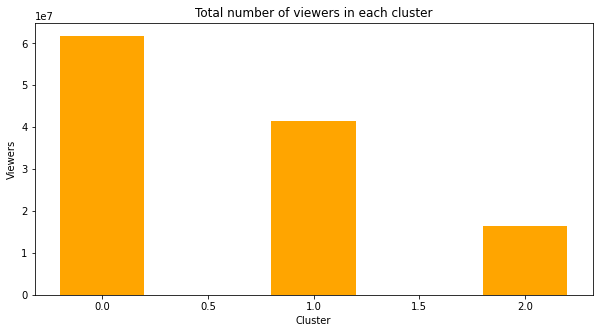

In [ ]:
# creating the parameters

x = data['Cluster']
y = data['viewers']
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='orange',width = 0.4)
 
plt.xlabel("Cluster")
plt.ylabel("Viewers")
plt.title("Total number of viewers in each cluster")
plt.show()

A great difference in the total viewer count can be obsereved in each cluster.

In [ ]:
# Total number of states in each cluster
data = df_clusters.groupby('Cluster')['state'].count().reset_index()
data

,Cluster,state
0,0.0,21
1,1.0,4
2,2.0,23


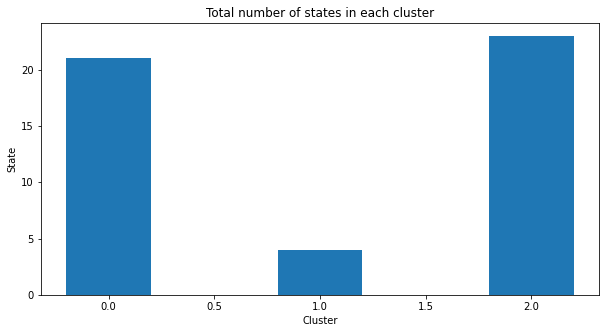

In [ ]:
# creating the parameters

x = data['Cluster']
y = data['state']
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y,width = 0.4)
 
plt.xlabel("Cluster")
plt.ylabel("State")
plt.title("Total number of states in each cluster")
plt.show()

Though, the distribution of states among clusters is farily uneven, but here we are interestd in extracting similarities, not perfect looking clusters!

In [ ]:
#plotly scatter plot of the new clustering
fig = px.scatter(df2, y="media channels", x="viewers",
	         size="viewers", color="Cluster",
                 hover_name="state",  size_max=60)
fig.show()

# Media channels to Viewers Relation in each cluster

In [ ]:
#media channels to viewers in each cluster
data = df2.groupby('Cluster')[['viewers','media channels']].sum().reset_index()
data

,Cluster,viewers,media channels
0,0.0,61765110,322
1,1.0,41497455,91
2,2.0,16459392,350


In [ ]:
#plotly scatter plot
fig = px.scatter(data, y="media channels", x="viewers",
	         size="viewers", color="Cluster",
                 hover_name="Cluster", log_x=True, size_max=60)
fig.show()

Visual of Three dense clusters identifying the differences between them.

# Merging Clusters into Main Dataframe

In [ ]:
df_merge = df_clusters[['state','Cluster']]
df_merge.head()

,state,Cluster
0,Alabama,0.0
1,Alaska,2.0
2,Arizona,0.0
3,Arkansas,2.0
4,California,1.0


In [ ]:
df = df.merge(df_merge,how = 'left', on = 'state')

In [ ]:
df["Cluster"] = df["Cluster"].astype(str)

In [ ]:
df.head()

,state,gender,age_group,status,viewers,population,potential_viewers,Cluster
0,Alabama,male,13-19,employed,142950,346675,45744,0.0
1,Alabama,male,13-19,unemployed,116018,281360,74252,0.0
2,Alabama,female,13-19,employed,129484,296432,18128,0.0
3,Alabama,female,13-19,unemployed,129484,331602,98408,0.0
4,Alabama,male,20-29,employed,109388,265282,71102,0.0


# Average viewers in each cluster

In [ ]:
mean = df.groupby(['Cluster'])['viewers'].mean().round().reset_index()

idx = mean.groupby(['Cluster'])['viewers'].transform(max) == mean['viewers']
mean = mean[idx]
mean

,Cluster,viewers
0,0.0,183825.0
1,1.0,648398.0
2,2.0,44727.0


[Text(0.5, 1.0, 'Average Viewers in each Cluster')]

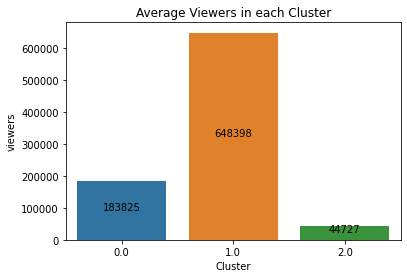

In [ ]:
#bar plot
ax = sns.barplot(data = mean, x = 'Cluster',y= 'viewers' )

#bar labels
for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()/2 
                value = '{:.0f}'.format(p.get_height())
                angle = 90
                ax.text(_x, _y, value, ha="center")
ax.set(title='Average Viewers in each Cluster')

Cluster 1 shows the max amount of average veiwers whereas cluster 2 shoes the minimum amount of average viewers.

# Average population in each cluster

In [ ]:
mean = df.groupby(['Cluster'])['population'].mean().round().reset_index()

idx = mean.groupby(['Cluster'])['population'].transform(max) == mean['population']
mean[idx]

,Cluster,population
0,0.0,476547.0
1,1.0,1725362.0
2,2.0,133845.0


[Text(0.5, 1.0, 'Average Population in each Cluster')]

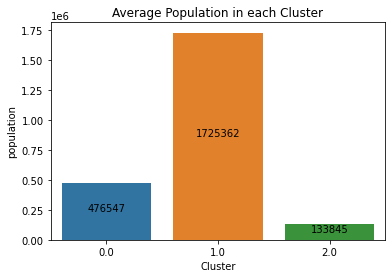

In [ ]:
#bar plot
ax = sns.barplot(data = mean, x = 'Cluster',y= 'population' )

#bar labels
for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()/2 
                value = '{:.0f}'.format(p.get_height())
                angle = 90
                ax.text(_x, _y, value, ha="center")
#Plot Title
ax.set(title='Average Population in each Cluster')

Cluster 1 covers the most population. However Cluster 0 and cluster 2 holds onto the position 2nd and 3rd respectively.


# Max viewers by Age-Group and State for each cluster

In [ ]:
max_viewers = df.groupby(['Cluster','age_group','state'])['viewers'].max().reset_index()

idx = max_viewers.groupby(['Cluster'])['viewers'].transform(max) == max_viewers['viewers']
max_viewers = max_viewers[idx]
max_viewers

,Cluster,age_group,state,viewers
15,0.0,13-19,Pennsylvania,600190
98,1.0,50+,New York,1220373
185,2.0,50+,Oklahoma,158304


[Text(0, 0, 'Age-Group  13-19\nState  Pennsylvania\nCluster  0.0'),
 Text(0, 0, 'Age-Group  50+\nState  New York\nCluster  1.0'),
 Text(0, 0, 'Age-Group  50+\nState  Oklahoma\nCluster  2.0')]

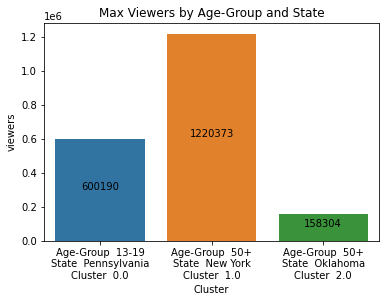

In [ ]:
#bar plot
ax = sns.barplot(data = max_viewers, x = 'Cluster',y= 'viewers' )

#bar labels
for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()/2 
                value = '{:.0f}'.format(p.get_height())
                angle = 90
                ax.text(_x, _y, value, ha="center")
ax.set(title='Max Viewers by Age-Group and State')

#creating Ticks String
ticks = ("Age-Group  "+max_viewers['age_group']+"\nState  "+max_viewers['state']+"\n"+"Cluster  "+max_viewers["Cluster"]).tolist()

# set the ticks first
ax.set_xticks(range(3))

# set the labels
ax.set_xticklabels(ticks)

The most viewers identified from each cluster is as follow:

> Cluster 0:

In the state of Pennsylvania, the people under the age bracket of 13-19 years hold the most viewer count.

> Cluster 1:

In the state of New York, the people above age 50 years hold the most viewer count.

> Cluster 2:

In the state of Oklahoma, the people above the age of 50 hold the most viewer count.







# Max viewers by Gender and State for each cluster

In [ ]:
max_viewers = df.groupby(['Cluster','gender','state'])['viewers'].max().reset_index()

idx = max_viewers.groupby(['Cluster'])['viewers'].transform(max) == max_viewers['viewers']
max_viewers= max_viewers[idx]
max_viewers

,Cluster,gender,state,viewers
36,0.0,male,Pennsylvania,600190
44,1.0,female,New York,1220373
66,2.0,female,Oklahoma,158304


[Text(0, 0, 'Gender  male\nState  Pennsylvania\nCluster  0.0'),
 Text(0, 0, 'Gender  female\nState  New York\nCluster  1.0'),
 Text(0, 0, 'Gender  female\nState  Oklahoma\nCluster  2.0')]

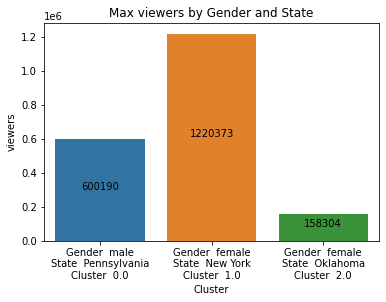

In [ ]:
#bar plot
ax = sns.barplot(data = max_viewers, x = 'Cluster',y= 'viewers' )

#bar labels
for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()/2 
                value = '{:.0f}'.format(p.get_height())
                angle = 90
                ax.text(_x, _y, value, ha="center")
ax.set(title="Max viewers by Gender and State")

#creating Ticks String
ticks = ("Gender  "+max_viewers['gender']+"\nState  "+max_viewers['state']+"\n"+"Cluster  "+max_viewers["Cluster"]).tolist()

# set the ticks first
ax.set_xticks(range(3))

# set the labels
ax.set_xticklabels(ticks)

The most viewers category identified from each cluster is as follow:

> Cluster 0:

In the state of Pennsylvania, male viewers holds the majority.

> Cluster 1:

In the state of New York, females hold the most viewer count.

> Cluster 2:

In the state of Oklahoma, female viewwers shows the max viewer count.







# Max population in each cluster by Gender and State

In [ ]:
max_pop = df.groupby(['Cluster','gender','state'])['population'].max().reset_index()

idx = max_pop.groupby(['Cluster'])['population'].transform(max) == max_pop['population']
max_pop = max_pop[idx]
max_pop

,Cluster,gender,state,population
25,0.0,male,Illinois,1717899
42,1.0,female,California,3771377
82,2.0,male,Maryland,668324


[Text(0, 0, 'Gender  male\nState  Illinois\nCluster  0.0'),
 Text(0, 0, 'Gender  female\nState  California\nCluster  1.0'),
 Text(0, 0, 'Gender  male\nState  Maryland\nCluster  2.0')]

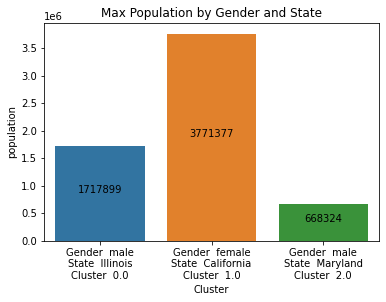

In [ ]:
#bar plot
ax = sns.barplot(data = max_pop, x = 'Cluster',y= 'population' )

#bar labels
for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()/2 
                value = '{:.0f}'.format(p.get_height())
                angle = 90
                ax.text(_x, _y, value, ha="center")
ax.set(title="Max Population by Gender and State")

#creating Ticks String
ticks = ("Gender  "+max_pop['gender']+"\nState  "+max_pop['state']+"\n"+"Cluster  "+max_pop["Cluster"]).tolist()

# set the ticks first
ax.set_xticks(range(3))

# set the labels
ax.set_xticklabels(ticks)

The Max Population identified from each cluster is as follow:

> Cluster 0:

In the state of Illinois, male population holds the majority.

> Cluster 1:

In the state of California, female population holds most count.

> Cluster 2:

In the state of Maryland, male population shows the max count.








# Max population in each cluster by Age-Group and State

In [ ]:
max_pop = df.groupby(['Cluster','age_group','state'])['population'].max().reset_index()

idx = max_pop.groupby(['Cluster'])['population'].transform(max) == max_pop['population']
max_pop = max_pop[idx]
max_pop

,Cluster,age_group,state,population
4,0.0,13-19,Illinois,1717899
88,1.0,20-29,California,3771377
132,2.0,20-29,Maryland,668324


[Text(0, 0, 'Age-Group  13-19\nState  Illinois\nCluster  0.0'),
 Text(0, 0, 'Age-Group  20-29\nState  California\nCluster  1.0'),
 Text(0, 0, 'Age-Group  20-29\nState  Maryland\nCluster  2.0')]

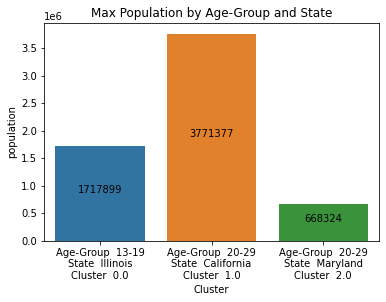

In [ ]:
#bar plot
ax = sns.barplot(data = max_pop, x = 'Cluster',y= 'population' )

#bar labels
for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()/2 
                value = '{:.0f}'.format(p.get_height())
                angle = 90
                ax.text(_x, _y, value, ha="center")
ax.set(title="Max Population by Age-Group and State")

#creating Ticks String
ticks = ("Age-Group  "+max_pop['age_group']+"\nState  "+max_pop['state']+"\n"+"Cluster  "+max_pop["Cluster"]).tolist()

# set the ticks first
ax.set_xticks(range(3))

# set the labels
ax.set_xticklabels(ticks)

The Max Population identified from each cluster is as follow:

> Cluster 0:

In the state of Illinois, people in the age bracket of 13-19 years holds the max population count.

> Cluster 1:

In the state of California, population in the age bracker of 20-29 years holds the max count.

> Cluster 2:

In the state of Maryland, 20-29 years old people shoes the max population in this cluster.








# Max potential viewers in each cluster by age group gender status


In [ ]:
max_pot_viewers = df.groupby(['Cluster','age_group','gender','status','state'])['potential_viewers'].max().reset_index()

idx = max_pot_viewers.groupby(['Cluster'])['potential_viewers'].transform(max) == max_pot_viewers['potential_viewers']
max_pot_viewers = max_pot_viewers[idx]
max_pot_viewers

,Cluster,age_group,gender,status,state,potential_viewers
76,0.0,13-19,male,unemployed,Ohio,545453
348,1.0,13-19,male,unemployed,California,945841
413,2.0,13-19,female,employed,Nevada,114992


[Text(0, 0, 'Age-Group  13-19\nGender  male\nState  Ohio\nCluster  0.0'),
 Text(0, 0, 'Age-Group  13-19\nGender  male\nState  California\nCluster  1.0'),
 Text(0, 0, 'Age-Group  13-19\nGender  female\nState  Nevada\nCluster  2.0')]

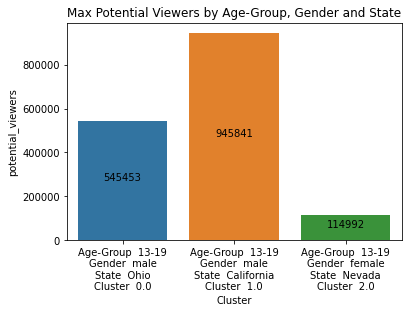

In [ ]:
#bar plot
ax = sns.barplot(data = max_pot_viewers, x = 'Cluster',y= 'potential_viewers' )

#bar labels
for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()/2 
                value = '{:.0f}'.format(p.get_height())
                angle = 90
                ax.text(_x, _y, value, ha="center")
ax.set(title="Max Potential Viewers by Age-Group, Gender and State")
#creating Ticks String
ticks = ("Age-Group  "+max_pot_viewers['age_group']+"\nGender  "+max_pot_viewers['gender']+"\nState  "+max_pot_viewers['state']+"\n"+"Cluster  "+max_pot_viewers["Cluster"]).tolist()

# set the ticks first
ax.set_xticks(range(3))

# set the labels
ax.set_xticklabels(ticks)

The Max Potential Viewers identified from each cluster is as follow:

> Cluster 0:

In the state of Ohio, people in the age bracket of 13-19 years, who are male shows the highest count of potential viewers.

> Cluster 1:

In the state of California, males in the age bracket of 13-19 years have gained the max count of potential viewers.

> Cluster 2:

In the state of Nevada, 13-19 years old females shoes the max potential viewer count in this cluster.





